In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load datasets
train_df = pd.read_csv("participants_training_dataset.csv")
test_df = pd.read_csv("participants_test_dataset.csv")

# Fill missing values in Annual_Income with median
train_df["Annual_Income"].fillna(train_df["Annual_Income"].median(), inplace=True)
test_df["Annual_Income"].fillna(test_df["Annual_Income"].median(), inplace=True)

# Convert Reg_Date to datetime and extract features
train_df["Reg_Date"] = pd.to_datetime(train_df["Reg_Date"], format="%d-%m-%Y")
test_df["Reg_Date"] = pd.to_datetime(test_df["Reg_Date"], format="%d-%m-%Y")

train_df["Reg_Days_Since"] = (pd.to_datetime("2025-02-01") - train_df["Reg_Date"]).dt.days
test_df["Reg_Days_Since"] = (pd.to_datetime("2025-02-01") - test_df["Reg_Date"]).dt.days

# Convert Birth_Year to Age
train_df["Age"] = 2025 - train_df["Birth_Year"]
test_df["Age"] = 2025 - test_df["Birth_Year"]

# Drop unnecessary columns (KEEP User_Key in test dataset)
columns_to_drop_train = ["User_Key", "Reg_Date", "Birth_Year"]
columns_to_drop_test = ["Reg_Date", "Birth_Year"]  # Keep User_Key

train_df.drop(columns=columns_to_drop_train, inplace=True)
test_df.drop(columns=columns_to_drop_test, inplace=True)

# Encode categorical features
label_encoders = {}
for col in ["Edu_Level", "Family_Status"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
numeric_features = ["Annual_Income", "Reg_Days_Since", "Age"]
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])
test_df[numeric_features] = scaler.transform(test_df[numeric_features])

# Save preprocessed data
train_df.to_csv("preprocessed_train.csv", index=False)
test_df.to_csv("preprocessed_test.csv", index=False)

print("Preprocessing complete. Files saved correctly, including User_Key in test set.")


Preprocessing complete. Files saved correctly, including User_Key in test set.


C:\Users\PMLS\AppData\Local\Temp\ipykernel_20324\3049161546.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Annual_Income"].fillna(train_df["Annual_Income"].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_20324\3049161546.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

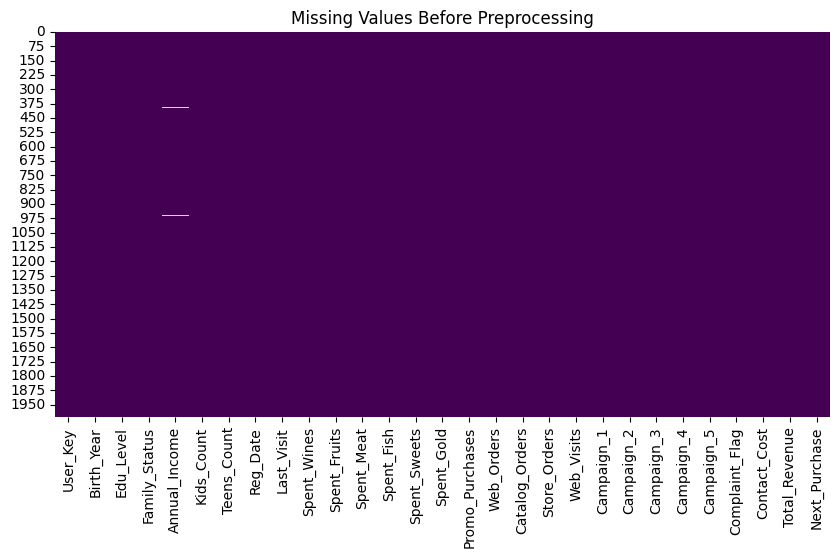

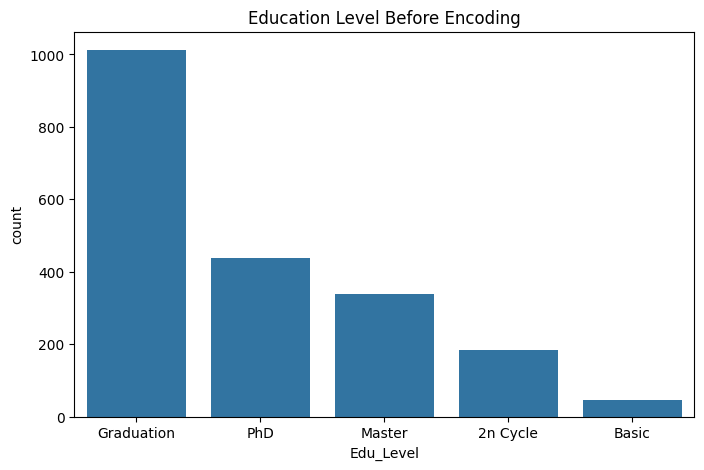

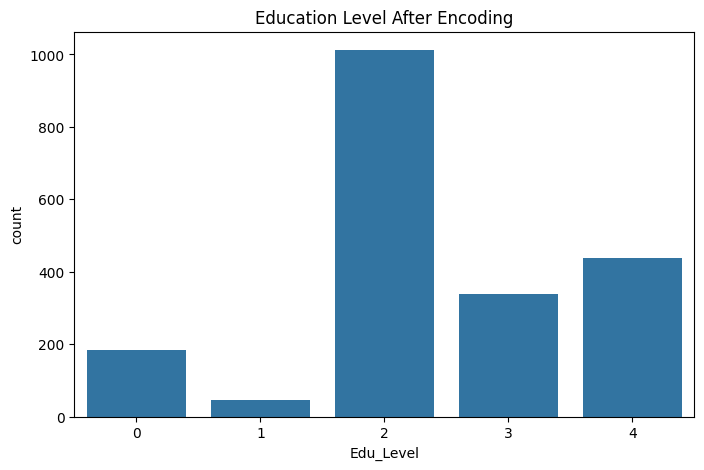

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reload original datasets for comparison
original_train_df = pd.read_csv("participants_training_dataset.csv")

# Visualizing missing values before preprocessing
plt.figure(figsize=(10, 5))
sns.heatmap(original_train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Before Preprocessing")
plt.show()

# Visualizing categorical feature encoding
plt.figure(figsize=(8, 5))
sns.countplot(x="Edu_Level", data=original_train_df, order=original_train_df["Edu_Level"].value_counts().index)
plt.title("Education Level Before Encoding")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x="Edu_Level", data=train_df)
plt.title("Education Level After Encoding")
plt.show()

